In [0]:
import numpy as np

# Whole Class with additions:
class Neural_Network(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1,lmbda = .0001):        
        #Define Hyperparameters
        self.inputLayerSize = inputNode
        self.outputLayerSize = outputNode
        self.hiddenLayerSize = hiddenNode
        self.Lambda = lmbda
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def loss(self, yHat, y):
        #Compute loss for given X,y, use weights already stored in class.
        J = 0.5*sum((y-yHat)**2)
        return J
        
    
    def loss_reg(self, yHat, y):
        #!Task1: compute loss with L1 regularization
        J = 0.5*sum((y-yHat)**2) + (self.Lambda/2)*( np.sum(np.absolute(self.W1))+np.sum(np.absolute(self.W2)) )
        return J
    
    def backward(self, X,yHat, y):
        self.yHat = yHat
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        return dJdW1,dJdW2#np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
    def backward_reg(self, X,yHat, y):
        #!Task2: Implement the backward with regularization
        self.yHat = yHat 
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3) + self.Lambda*(np.absolute(self.W2))
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2) + self.Lambda*(np.absolute(self.W1))
        return dJdW1,dJdW2#np.concatenate((dJdW1.ravel(), dJdW2.ravel()))


In [0]:
def train_reg(NN,X, y,Xt, yt,epoch = 10000,lr = .1):
    list_loss = []
    list_lossTest = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward_reg(X,yHat,y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr 
        NN.W2 -= gradW2 * lr
        
        if i%100 == 0 : 
            loss = NN.loss_reg(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)
            
            #check the loss of testing 
            list_lossTest.append(NN.loss(NN.forward(Xt),yt))
        
    return list_loss,list_lossTest    


before  [[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]
 [0.6 0.3]] [[0.75]
 [0.82]
 [0.93]
 [0.7 ]] = [[0.29546857]
 [0.2913231 ]
 [0.27236352]
 [0.28712431]]
Loss 0=[0.54476147]
Loss 100=[0.02009381]
Loss 200=[0.01175338]
Loss 300=[0.01120225]
Loss 400=[0.0111293]
Loss 500=[0.01110154]
Loss 600=[0.01107954]
Loss 700=[0.01105911]
Loss 800=[0.0110397]
Loss 900=[0.01102121]
Loss 1000=[0.01100357]
Loss 1100=[0.01098674]
Loss 1200=[0.01097067]
Loss 1300=[0.01095534]
Loss 1400=[0.01094069]
Loss 1500=[0.01092669]
Loss 1600=[0.01091331]
Loss 1700=[0.01090053]
Loss 1800=[0.0108883]
Loss 1900=[0.0108766]
Loss 2000=[0.0108654]
Loss 2100=[0.01085468]
Loss 2200=[0.01084441]
Loss 2300=[0.01083457]
Loss 2400=[0.01082513]
Loss 2500=[0.01081608]
Loss 2600=[0.01080739]
Loss 2700=[0.01079905]
Loss 2800=[0.01079104]
Loss 2900=[0.01078334]
Loss 3000=[0.01077594]
Loss 3100=[0.01076882]
Loss 3200=[0.01076196]
Loss 3300=[0.01075536]
Loss 3400=[0.01074899]
Loss 3500=[0.01074286]
Loss 3600=[0.01073694]
Loss 3700=[0.01073123

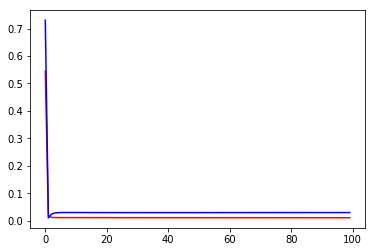

In [81]:
#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainY, axis=0)
testY = testY/100 #Max test score is 100

#NN = Neural_Network()
NN = Neural_Network(lmbda = .0001)

print('before ',trainX,trainY,'=',NN.forward(trainX))
#Train network with new data:
#list_loss,list_loss2 = train(NN,trainX,trainY,testX,testY)

list_loss,list_loss2 = train_reg(NN,trainX,trainY,testX,testY)

print('before ',trainX,trainY,'=',NN.forward(trainX))

#!Task3:Observe the different. Pay attentioin to your lambda value
import matplotlib.pyplot as plt
plt.plot(list_loss, 'r') #train - red
plt.plot(list_loss2, 'b') #test - blue
plt.show()